# New Section

### 1. Import Resources


In [ ]:
!pip3 install transformers

     |████████████████████████████████| 1.9MB 10.2MB/s 
     |████████████████████████████████| 890kB 33.0MB/s 
     |████████████████████████████████| 3.2MB 44.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=ae994b0dfcc7b0faa781ef97e58feb5cfbd1bac73782c552449254c4eaca1ef0
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!pip3 install sentencepiece

     |████████████████████████████████| 1.2MB 11.1MB/s 


In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer, AutoModelForSeq2SeqLM

## 1.1 Loading BART Pretrained Model and the corresponding tonkenizer.

In [ ]:
model_name = 'facebook/bart-large-cnn'

In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Basic summarization task for illustration.

In [ ]:
ARTICLE= """Picture this: a herd of elephants flies past you at sixty miles per hour, followed by a streak of tigers, a pride of lions, and a bunch of clowns. 
What do you see? It must be a circus train! One of the first uses of the circus train is credited to W.C. Coup. He 
partnered with P.T. Barnum in 1871 to expand the reach of their newly combined shows using 
locomotives. Before circus trains, these operators had to lug around all of their animals, 
performers, and equipment with a team of more than 600 horses. Since there were no highways, 
these voyages were rough and took a long time. Circuses would stop at many small towns 
between the large venues. Performing at many of these small towns was not very profitable. 
Because of these limitations, circuses could not grow as large as the imaginations of the 
operators. After they began using circus trains, Barnum and Coup only brought their show to 
large cities. These performances were much more profitable and the profits went toward creating 
an even bigger and better circus. Multiple rings were added and the show went on. Today, 
Ringling Bros. and Barnum and Bailey Circus still rely on the circus train to transport their 
astounding show, but now they use two."""
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", truncation=True, max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, num_beams=4, length_penalty=2.0, early_stopping=True)
print("Your summary: ")
print(tokenizer.decode(outputs[0]))

Your summary: 
</s><s>The first circus train was used by W.C. Coup and P.T. Barnum in 1871. The trains allowed them to expand the reach of their combined shows. Ringling Bros. and Barnum and Bailey Circus still rely on the circus train to transport their show.</s>


### 2. Summarization with Blurr Library using fastai v2.5.5

In [ ]:
!pip install ohmeow-blurr -q
!pip install datasets -q

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 194kB 13.0MB/s 
     |████████████████████████████████| 4.1MB 17.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 184kB 47.3MB/s 
     |████████████████████████████████| 14.5MB 247kB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 245kB 44.9MB/s 
     |████████████████████████████████| 112kB 48.2MB/s 


In [ ]:
!pip install bert-score -q

     |████████████████████████████████| 61kB 5.4MB/s 


In [ ]:
import datasets
import pandas as pd
import seaborn as sns
from fastai.text.all import *
from transformers import *

from blurr.data.all import *
from blurr.modeling.all import *

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## 2.1.1 Loading Dataset

In [ ]:
# using a subset of the training set to build both training and validation DataLoaders; https://huggingface.co/docs/datasets/splits.html

raw_data = datasets.load_dataset('reddit_tifu','long',split='train[:100%]')

Dataset reddit_tifu downloaded and prepared to /root/.cache/huggingface/datasets/reddit_tifu/long/1.1.0/c383d53c57bebbb2972419fc23c3f58639c7f9074004ef1c49c1c0bcfa2218a3. Subsequent calls will reuse this data.


# 2.1.2 Exploratory Data analysis

In [ ]:
#showing an example of dataset
df = pd.DataFrame(raw_data)
df.head(5)

,documents,num_comments,score,title,tldr,ups,upvote_ratio
0,"this actually happened a couple of years ago. i grew up in germany where i went to a german secondary school that went from 5th to 13th grade (we still had 13 grades then, they have since changed that). my school was named after anne frank and we had a club that i was very active in from 9th grade on, which was dedicated to teaching incoming 5th graders about anne franks life, discrimination, anti-semitism, hitler, the third reich and that whole spiel. basically a day where the students' classes are cancelled and instead we give them an interactive history and social studies class with lot...",23.0,115.0,gender-stereotyping,confuse a 5th grade girl for a boy in front of half of her class. kids are mean. sorry sandra.**,115.0,0.88
1,"it was last october, but i'm feeling the fall-out from it the most today. \n\nafter my mom died from cancer last year, i started looking for my estranged father. i had only known him for a short time when i was 6 and barely remembered more than his name. i never knew why he left and my mom would not talk about him without obvious emotional pain, so i didn't push her for information about him. i figured he didn't care about us.\n\ni had googled him multiple times over the years, but he was always unlisted and i didn't have an address with which to search. after her death, i felt strong...",12.0,16.0,telling my dad that i love him.,"i found my estranged dad, thought i loved him after getting to know him, got to know him better and changed my mind.",16.0,0.79
2,"so i had the brilliant idea to use veet hair removal gel as the ol' danglies were in need of a trim and i had heard that veet leaves them smoother for longer. well i guess thats right when the skin has to grow back first. \n\npre-story: i tried this before and the results were great but i had decided to do it again because of how well it worked. \n\nso i take out the gel/cream stuff and just lob it on and cover the forest. the slight peroxide kinda smell ensued and all was going well, there was a slight burning but thats to be expected, you know, melting pubes off does that. so comes the a...",10.0,55.0,i was deveeted...,had my balls burned by sauron and was left deveeted.,55.0,0.85
3,"today i was going to have a bath after a long day of painting kids faces at a carnival. all would go well, except being the genius i am, i put in some epsom salts (i always do for my bath), and i grabbed my bottle of peppermint essential oil.\n\n lately, i've been on a diy-pinterest-tumblr-let's-make-my-own-shit-and-be-fancy spree. the other day i took a 'detox bath' (fyi did nothing for me guys. uselessss). so, my brain totally went 'hey, trajectorys, put some peppermint in! it's good for your skin!' okay brain!\n\nso, instead of logically putting in like... 5 drops so it's nice and minty...",20.0,90.0,wanting a pepperminty bath.,peppermint + bath = burning cold ladybits.,90.0,0.92
4,"i haven't had a bath in practically years so, after finally moving into a house with a bath, i decide to have one. having recently purchased a shiny new bag of weed, i thought combining the two would be a good idea.\n\npicture this; a very cramped bathroom, no windows, a shitty extractor fan, closed door, steaming hot bath and a spliff. as i lay there gently swishing to and fro, giggling like a little school girl, i neglected to notice how hot the room was becoming. \n\nafter a while i looked up and realised i could barely even see the taps in front of me. naturally, i begin to panic and s...",18.0,81.0,having a spliff in the bath.,"got too high and too hot in the bath, almost cooked myself like a lobster.",81.0,0.79


In [ ]:
#removing special characters from the summaries in the dataset.
df.tldr = df.tldr.str.replace('[#,@,&,!,$,%,^,&,*]', '')

In [ ]:
#dataset dimensions before preprocessing.
print("our data set has {} rows and {} columns".format(df.shape[0],df.shape[1]))
print("The {} feature is our target feature and we are summarizing text from {} column.".format(df.columns[4],df.columns[0]))
#raw_data.shape

our data set has 42139 rows and 7 columns
The tldr feature is our target feature and we are summarizing text from documents column.


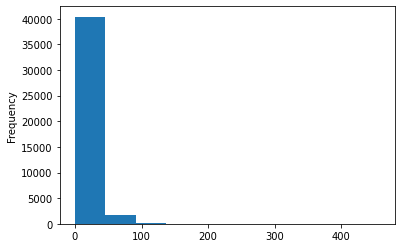

In [ ]:
df['totalwords'] = df['tldr'].str.split().str.len()
df["totalwords"].plot(kind="hist")

In [ ]:
print("The longest sentence in the summaries have {} words.".format(df.totalwords.max()))

The longest sentence in the summaries have 457 words.


Text(0, 0.5, 'number of summarized sentences')

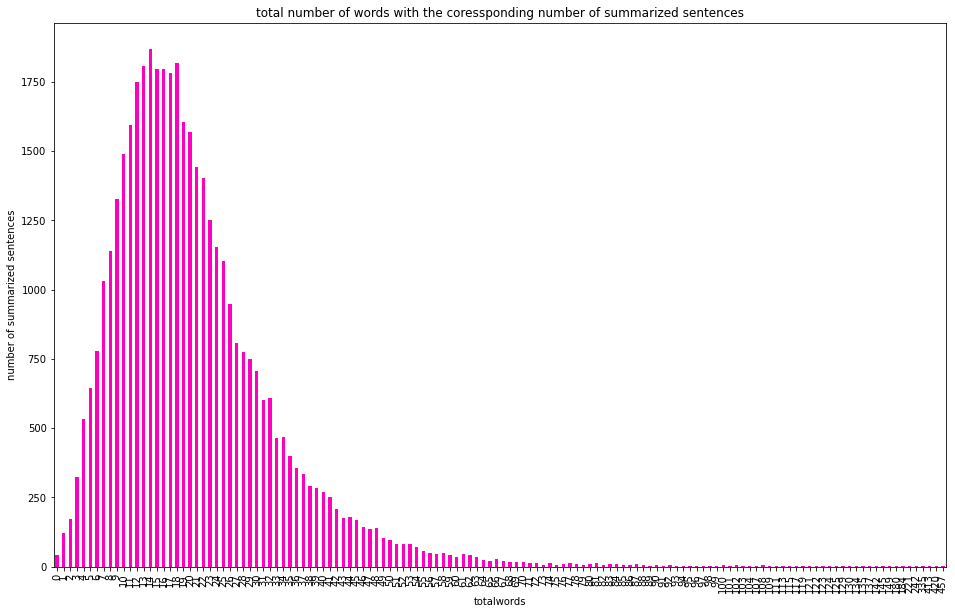

In [ ]:
#bar plot showing the total number of words with the coressponding number of summarized sentences.
grouping =df.groupby("totalwords")
y = grouping.tldr.count()
yplt =y.plot(kind="bar",figsize=(16,10),colormap="gist_rainbow_r",title="total number of words with the coressponding number of summarized sentences")
yplt.set_ylabel("number of summarized sentences")

In [ ]:
#plt.figure(figsize=(12,4))
#sns.distplot(df['totalwords'],kde=False,bins=200)
#plt.xlim(0,130)

In [ ]:
#showing an example of the summaries in the dataset having words between 16 and 25
x =df[ (df.totalwords > 16) & (df.totalwords < 25) ]
#counting the number of summary examples having words between 16 and 25
#x.tldr.count()
x.tldr

0                               confuse a 5th grade girl for a boy in front of half of her class. kids are mean. sorry sandra.
1           i found my estranged dad thought i loved him after getting to know him got to know him better and changed my mind.
6                   tried to microwave french fries and stuck my finger into a franken-fuck of pain causing first degree burns
10                        lost my virginity on someones driveway with a girl i didn't give a shit about and peed in her mouth.
12                                           i told my sister i came on my mother last night because of a song she was singing
                                                                 ...                                                          
42121                           gambled away all my saving i made this summer. money i should be spending on clothes and food.
42131                        i thought i had a job moved  signed a lease only for the job to get canceled leavi

In [ ]:
#filter the dataset with target features having total words less than 31 
df = df[df.tldr.str.split().str.len() <= 130]

In [ ]:
#filter the dataset with target features having total words more than 21
df = df[df.tldr.str.split().str.len() > 49]

Text(0, 0.5, 'number of summarized sentences')

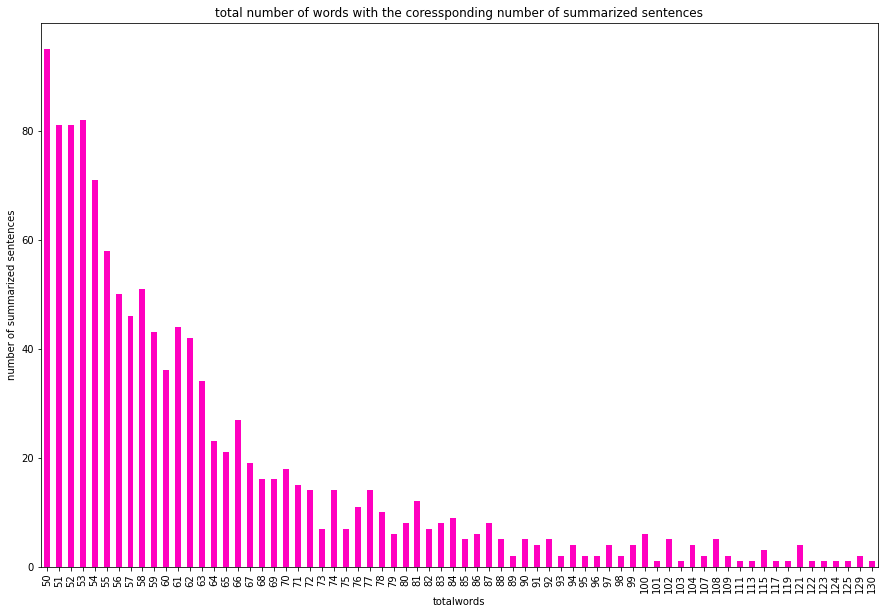

In [ ]:
#bar plot showing the total number of words with the coressponding number of summarized sentences after removing outliers.
grouping =df.groupby("totalwords")
y = grouping.tldr.count()
yplt =y.plot(kind="bar",figsize=(15,10),colormap="gist_rainbow_r",title="total number of words with the coressponding number of summarized sentences")
yplt.set_ylabel("number of summarized sentences")

In [ ]:
print("our data set now has {} rows and {} columns after removing outliers.".format(df.shape[0],df.shape[1]))

our data set now has 1200 rows and 8 columns after removing outliers.


In [ ]:
#example of a given summary
print("Summarization example: \n{}".format(df['tldr'].iloc[2]))

Summarization example: 
i locked my keys in my locker including the key for my lock. i then had to walk my fat ass up to the front desk in my underwear and ask the female front desk attendant for the bolt cutters so i could get my clothes keys and everything else out.


In [ ]:
#checking if our target feature having any empty strings
list(df[df['tldr'] == ''].index)

[]

In [ ]:
df['tldr']

7                                                                                                                                                                                                                                                                                          my truck went vroom vroom into a ditch. i tried to get it out and it tried to kill me. after shouting "ole" and getting scratched up more than a husband having sex with a kinky cougar two rednecks helped me out of a perilous predicament. and now me my testicles and my truck are all safe and sound.
18       would be that he effectively told me i should live in a region he hates and i admire because i clearly don't understand the political climate — in so many words we should break things off. however it's much deeper than that. apparently half his family is from said region (and it's the half he dislikes of course) and he had lived there a very brief period of time. despite all that apparently he had never ha

In [ ]:
#after removing outliers 
#plt.figure(figsize=(12,4))
#sns.distplot(df['totalwords'],kde=False,bins=10)
#plt.xlim(0,60)

In [ ]:
#df["totalwords"].mean()
#df["number_of_words"].max() 
print("The minmum number of words in a summary is {}".format(df["totalwords"].min()))
print("The maximum number of words in a summary is {}".format(df["totalwords"].max()))
print("The avarege number of words in a summary is {}".format(df["totalwords"].mean()))

The minmum number of words in a summary is 50
The maximum number of words in a summary is 130
The avarege number of words in a summary is 62.965833333333336


# 2.2 getting the required objects (the architecture, tokenizer, config, and model, using get_hf_objects helper method

In [ ]:
#getting the required objects (the architecture, tokenizer, config, and model, using get_hf_objects helper method
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR_MODEL_HELPER.get_hf_objects(pretrained_model_name, 
                                                                               model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [ ]:
#parameters dict generation with the default values 
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization')
text_gen_kwargs

{'bad_words_ids': None,
 'bos_token_id': 0,
 'decoder_start_token_id': 2,
 'diversity_penalty': 0.0,
 'do_sample': False,
 'early_stopping': True,
 'encoder_no_repeat_ngram_size': 0,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'max_length': 142,
 'min_length': 56,
 'no_repeat_ngram_size': 3,
 'num_beam_groups': 1,
 'num_beams': 4,
 'num_return_sequences': 1,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'pad_token_id': 1,
 'repetition_penalty': 1.0,
 'return_dict_in_generate': False,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'use_cache': True}

In [ ]:
#customizing the text generation by changing values in text_gen_kwargs
hf_batch_tfm = HF_Seq2SeqBeforeBatchTransform(hf_arch, hf_config, hf_tokenizer, hf_model, 
                                              max_length=256, max_tgt_length=130, text_gen_kwargs=
{'bad_words_ids': None,
 'bos_token_id': 0,
 'decoder_start_token_id': 2,
 ##final 1 from 0
 'diversity_penalty': 1.0,
 'do_sample': False,
 'early_stopping': True,
 'eos_token_id': 2,
 #last 3 from 2
 'length_penalty': 1.0,
 #
 'max_length': 140,
 'min_length': 50,
 'no_repeat_ngram_size': 3,
 ##next final 1 
 'num_beam_groups': 5,
  #final change 
 'num_beams': 10,
 'num_return_sequences': 1,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'pad_token_id': 1,
 'repetition_penalty': 1.0,
 'return_dict_in_generate': False,
 ## 
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'use_cache': True})

blocks = (HF_Seq2SeqBlock(before_batch_tfm=hf_batch_tfm), noop)
#change article to document and change highlights to sumamry
dblock = DataBlock(blocks=blocks, get_x=ColReader('documents'), get_y=ColReader('tldr'), splitter=RandomSplitter())




In [ ]:
dls = dblock.dataloaders(df, bs=2)

In [ ]:
len(dls.train.items), len(dls.valid.items)

(960, 240)

In [ ]:
#batch shape
b = dls.one_batch()
len(b), b[0]['input_ids'].shape, b[1].shape

(2, torch.Size([2, 256]), torch.Size([2, 140]))

In [ ]:
dls.show_batch(dataloaders=dls, max_n=2)

,text,target
0,"i am an old hand at masturbation. like a grizzled and salty sea dog that has seen too many years on the bow of a battered tug boat, i think i’ve seen it all through a haze of white pipe smoke. **nods sagely**. only a few haggard superstitions from lands still inhabited by dragons remain. i’m no longer the masturbateur of my teens or even my twenties. i have learnt and grown along this epic voyage into the masturbator i am today. and just like any long voyage, games pass the time. except instead of “i spy” i have become exceedingly good at the game of things not to put your penis into.\n\nactually there are surprisingly few rules for this game. they say to someone with a hammer, everything is a nail, and i’ve nailed most things, even the things that are nailed down. a walkman? sure, put some blu tac around the gears and wear a condom and let it glide under the head. various fruits, bottles, back massagers? pfft child’s play. these weren’t the new-fangled internet days of a million voices coming together as one to solve the problem of sp",i used a soap filled rubber washing up glove as a fuck sleeve and flayed the glans of my penis like i was fucking a rusty cheese grater until it bled from the head. i proceeded to then make it worse by applying anaesthetic gel for teething babies on it and it turned the blood into rivers of burning fire. i am forever changed and the gods have wrought vengeance on me for my arrogance and pride
1,"as is tradition, this happened two days ago. however, i am still stuck in a foreign airport as a consequence of this shit happening! due to the long wait i have at the airport right now, this story will be detailed, and i apologise in advance for the length of this post. potato. \n\nthe story starts in bangkok, thailand. it doesn’t involve a thai prostitute, but involves the next worst thing; a thai taxi driver.\n\npart 1: the taxi\n\ni had just finished my holiday in thailand, and was about to head to the airport in bangkok to catch my flight back to new zealand (due to depart in 4 hour’s time). the date was 28 january 2016, and the time was 2.15pm. \n\nas i waited outside of my hotel lobby, i saw a taxi approaching and i hailed it down. the driver and i agreed that the meter would be used for the trip. having had some experience with the bangkok taxis, i knew that the trip to the airport could not be more than 400 baht at the very most. with that knowledge in mind, i saved exactly 400 baht in cash for this taxi",taxi driver stole my passport and money in bangkok. police found my passport after a whole night’s work. i then caught the next flight from bangkok to taipei with the hope of making a connecting flight back home to auckland. but the flight is full for the next few days. waiting here in taipei for the next flight with empty seats back home. fuck my life.


### **Training** 

In [ ]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
       
        }
    }

In [ ]:
model = HF_BaseModelWrapper(hf_model)
learn_cbs = [HF_BaseModelCallback]
fit_cbs = [HF_Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt() 
learn.freeze()

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.43651583790779114)

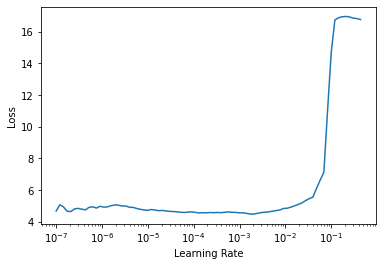

In [ ]:
learn.lr_find(suggestions=True)

In [ ]:
#running a batch to the model and output the shape
b = dls.one_batch()
preds = learn.model(b[0])
len(preds),preds[0], preds[1].shape

(4,
 tensor(4.7125, device='cuda:0', grad_fn=<NllLossBackward>),
 torch.Size([2, 96, 50264]))

In [ ]:
learn.fit_one_cycle(1, lr_max=3e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,time
0,3.181218,3.152706,0.317219,0.066936,0.186056,10:01


In [ ]:
 learn.show_results(learner=learn, max_n=2)

,text,target,prediction
0,"day 24 of my cross-country motorcycle trip back in august. i left vegas that morning swearing to never go back to that city again. it was going to be around a six hour ride before i would make my way to the north rim of the grand canyon, on a route that saw me going from nevada to arizona to utah and back to arizona where i would post up for some camping on the north rim.\n\nthe weather wasn't bad at all. blue skies and high temperatures, but it was nothing compared to the triple digit riding i was suffering through a few days previously. most of the ride went off without a hitch. but between a slight hangover and 90 degree temperatures, there were a lot of stops for water.\n\nwhile i was riding through the desert of arizona and utah, i was dodging storms for a good portion of the afternoon. most were small in size but whatever was in their path was absolutely drenched. my storm-dodging luck eventually ran out in utah. trapped in construction traffic, the patch of gray i had been eyeing for a few hours now was directly overhead. for a storm that looked so daunting in the distance, the rain was surprisingly light",get lost. get rained on. get hailed on. gets dark. get lost some more this time in a forest. dump bike. almost dump bike. dump bike. kill bike battery. get bike jumped. kill bike. get bike jumped in the rain. bike dies overnight. push start bike. kill bike with the kick stand. push start bike. gtfo of forest.,i was riding through the desert of arizona and utah when i was hit by a storm. i was stuck in construction traffic for over an hour and had to stop for water. i ended up having to stop in a small town for a few hours to get out of the storm.
1,"this story actually happened about 6 years ago. my sincerest apologies for the length of this story, as i am verbose and often include too many details. but i think reddit might enjoy this. \n\nit was a sunny warm sunday and i had been hunting for the recently released g1 android phone on craigslist. after emailing back and forth a few times, we arrived at a great price for not one but 2 phones! so, we arranged to meet at an apartment complex about 30 minutes away. i gathered my cash and drove to the location.\n\ni was stupid and young at the time, and did not comprehend how dangerous the part of town i was heading into was. but, i felt relatively safe upon arrival since it was a pretty well populated apartment complex and there were lots of people around in broad daylight. i was standing on the sidewalk in between the parking lot and the pool area, where a bunch of kids were playing, swimming, shooting each other with water guns, etc. parents were all around watching. even so, i had folded up all the money and stuffed it in an almost empty pack of cigarettes. i was wearing jeans, a t shirt, a gray hoodie with two pockets on the front, flip fl",(thanks to downbringer) op goes to buy phone from craigslist sale is a setup for a mugging. op gets maced and beat on they steal his wallet (but not the money as op was smart and hid it) and rip his jeans. op pulls out switch blade and acts like a mad man to scare his assailants off. op goes to petrol station and calls cops. assailants go to prison op wins at life.,"i was stupid and young at the time and didn't realize the dangers of the area i was walking into. i was standing on the sidewalk in between the parking lot and the pool area where a bunch of kids were playing, swimming, shooting each other with water guns, etc. parents were all around watching. i had folded up all the money and stuffed it in an almost empty pack of cigarettes."
